# Advanced Topics in Bayesian Linear Regression

## Probabilistic regression IV (The evidence approximation)

Using Bayesian linear regression, we could quantify epistemic uncertainty induced by limited data.
The method was quite powerful, but we had to pick the precision $\alpha$ of the weights, the measurement noise variance $\sigma^2$ by hand, or any basis function parameters such as the lengthscale $\ell$ of the radial basis functions.
The *evidence approximation* enables us to identify these parameters using the data.

Typically, we call all these parameters **hyper-parameters** of the model.
For convenience, let us denote all the hyper-parameters by $\theta$:

$$
\boldsymbol{\theta} = \{\sigma, \alpha, \ell,\dots\}.
$$

Like before, our model is:

$$
y(\mathbf{x};\mathbf{w}) = \sum_{j=1}^{m} w_{j}\phi_{j}(\mathbf{x}) = \mathbf{w^{T}\boldsymbol{\phi}(\mathbf{x})}
$$

with data likelihood:

$$
\mathbf{y}_{1:n} | \mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta} \sim p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}, \mathbf{w}, \boldsymbol{\theta}).
$$

The prior of the weights is:

$$
\mathbf{w} | \boldsymbol{\theta} \sim p(\mathbf{w}| \boldsymbol{\theta}).
$$

However, we now have to add a *hyper-prior*:

$$
\boldsymbol{\theta} \sim p(\boldsymbol{\theta}).
$$

Graphically:

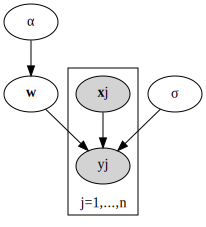

In [1]:
import numpy as npimport scipy.stats as stfrom graphviz import Digraphg2 = Digraph('full_bayes_regression_2')g2.node('alpha', label='<&alpha;>')g2.node('w', label='<<b>w</b>>')g2.node('sigma', label='<&sigma;>')with g2.subgraph(name='cluster_0') as sg:    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')    sg.node('yj', label='<y<sub>j</sub>>', style='filled')    sg.attr(label='j=1,...,n')    sg.attr(labelloc='b')g2.edge('alpha', 'w')g2.edge('sigma', 'yj')g2.edge('w', 'yj')g2.edge('xj', 'yj')g2.render('full_bayes_regression_2', format='png')g2

Notice that now $\alpha$ and $\sigma$ are not shaded because we do not fix them.

If we wanted to be fully Bayesian, we would write down the posterior of everything:

$$
p(\mathbf{w}, \boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta}).
$$

and, somehow, sample from it. We have yet to learn how to do this.
We will do it in [](lecture27) and [](lecture28).
Here, we will develop an approximation to fully Bayesian inference.

### The Evidence Approximation
Look at the marginal posterior of $\boldsymbol{\theta}$:

$$
p(\boldsymbol{\theta}|\mathbf{x}_{1:n}, \mathbf{y}_{1:n}) \propto 
\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\mathbf{w}.
$$

Assume that the hyper-prior is relatively flat:

$$
p(\boldsymbol{\theta}) \propto 1.
$$

Then use a maximum a posteriori estimate for $\boldsymbol{\theta}$:

$$
\boldsymbol{\theta}_{\text{EV}} = \arg\max_{\boldsymbol{\theta}}\int p(\mathbf{y}_{1:n}|\mathbf{x}_{1:n}|\mathbf{w},\boldsymbol{\theta})p(\mathbf{w}|\boldsymbol{\theta})d\mathbf{w}.
$$

The nice thing is that the right-hand side's integral is analytically available for Gaussian likelihood and prior.
What we did is called the *evidence approximation* of the hyper-parameters.

### Examples

See [this example](evidence_approximation).

## Probabilistic regression V (Automatic relevance determination)

The evidence approximation gave us a way to estimate the hyperparameters.
We now look at the problem of determining which basis functions to keep and which not.
The idea is to use a different precision $\alpha_i$ for each weight.
That is, the prior of the weight $w_j$ corresponding to the basis function $\phi_i(\mathbf{x})$ is: 

$$
p(w_i | \alpha_i) \propto \exp\left\{-\alpha_iw_i^2\right\}.
$$

Graphically, the model is as follows:

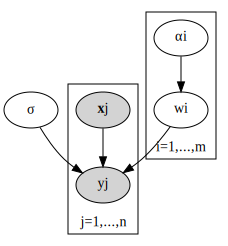

In [2]:
g3 = Digraph('full_bayes_regression_3')
g3.node('sigma', label='<&sigma;>')
with g3.subgraph(name='cluster_0') as sg:
    sg.node('xj', label='<<b>x</b><sub>j</sub>>', style='filled')
    sg.node('yj', label='<y<sub>j</sub>>', style='filled')
    sg.attr(label='j=1,...,n')
    sg.attr(labelloc='b')
with g3.subgraph(name='cluster_1') as sg:
    sg.node('alphai', label='<&alpha;<sub>i</sub>>')
    sg.node('wi', label='<w<sub>i</sub>>')
    sg.attr(label='i=1,...,m')
    sg.attr(labelloc='b')

g3.edge('alphai', 'wi')
g3.edge('sigma', 'yj')
g3.edge('wi', 'yj')
g3.edge('xj', 'yj')
g3.render('full_bayes_regression_3', format='png')
g3

Again, we need advanced techniques to carry out full Bayesian inference.
However, we can apply the evidence approximation to find all the hyper-parameters.
Now, here is what happens in this kind of model.
The precisions of the basis functions that are not needed will automatically become very large. Consequently, the posteriors of the corresponding basis function weights will collapse to a delta function centered at zero.

### Examples

See [this example](automatic_relevance_determination).

## Diagnostics: How do you know if the fit is good?

To objectively test the resulting model we need a *validation dataset* consisting of inputs:

$$
\mathbf{x}^v_{1:n^v} = \left(\mathbf{x}^v_1,\dots,\mathbf{x}^v_{n^v}\right),
$$

and corresponding, observed outputs:

$$
\mathbf{y}^v_{1:n^v} = \left(y^v_1,\dots,y^v_{n^v}\right).
$$

We will use this validation dataset to define some statistical diagnostics.

Statistical diagnostics compare the predictive distribution to the distribution of the validation dataset.
Assume that the predictive distribution is a Gaussian (as in all the examples above) with posterior predictive mean $m(\mathbf{x})$ and posterior predictive variance $\sigma(\mathbf{x})$ (including both aleatory and epistemic uncertainty).
Then, define the standardized errors:

$$
e_i = \frac{y_i^v - m\left(\mathbf{x}^v_i\right)}{\sigma\left(\mathbf{x}^v_i\right)}.
$$

If our model is correct, the standardized errors must be distributed as a standard Normal $N(0,1)$.
Why?
Well, if the model is correct $y_i^v$ must come from $N(m\left(\mathbf{x}^v_i\right), \sigma^2\left(\mathbf{x}^v_i\right))$.
Then it follows that $e_i\sim N(0,1)$.
To see this, consider the expectation:

$$
\mathbb{E}[e_i] = \dots = 0,
$$

and the variance:

$$
\mathbb{V}[e_i] = \dots = 1.
$$

You can prove these formulas using standard expectation and variance properties.

So, to test if the posterior predictive distribution is good, you do this:
+ Calculate the standardized errors of a validation dataset
+ Compare the standardized errors' empirical statistics to the standard Normal $N(0,1)$ statistics.

### Examples

See [this example](diagnostic_posterior_predictive).